**Лабораторная работа 2, Погодин Матвей Олегович, гр. 2371**

**1) Выбранный датасет**

https://www.kaggle.com/datasets/bhargavlc/studentsperformance

**2)**

**Считывание датасета**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Students Performance.csv')

print(df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0          65             86             67               78            2021
1          64             85             71               80            2019
2          76             77             77               84            2021
3          80             76             75               75            2021
4          63             91             62               90            2019


**Поправим датасет, удалив значения выходного атрибута - дата вступления в клуб:**

In [3]:
new_df = df.drop(df.columns[-1], axis=1)
print(new_df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score
0          65             86             67               78
1          64             85             71               80
2          76             77             77               84
3          80             76             75               75
4          63             91             62               90


**Добавление нового атрибута**

Добавим новый атрибут в выбранный датасет: добавим общее количество баллов, набранных по всем дисциплинам. Данный атрибут будет считаться по формуле:
Total_Score = Math_Score + Reading_Score + Writing_Score + Placement_Score.

In [4]:
new_df['Total_Score'] = new_df['Math_Score'] + new_df['Reading_Score'] + new_df['Writing_Score'] + new_df['Placement_Score']
print(new_df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Total_Score
0          65             86             67               78          296
1          64             85             71               80          300
2          76             77             77               84          314
3          80             76             75               75          306
4          63             91             62               90          306


**3)**

**Проверим есть ли пропущенные значения**

In [5]:
print(new_df.isnull().sum()) #пропущенных значений нет

Math_Score         0
Reading_Score      0
Writing_Score      0
Placement_Score    0
Total_Score        0
dtype: int64


**Проверим есть ли дубликаты**

In [6]:
duplicates = new_df.duplicated()
print("Дубликаты:\n", new_df[duplicates]) #дубликатов нет

Дубликаты:
 Empty DataFrame
Columns: [Math_Score, Reading_Score, Writing_Score, Placement_Score, Total_Score]
Index: []


**Обнаружение выбросов**

Осуществим поиск выбросов с помощью метода IQR (межквартильного размаха), который рассчитывается как разность между 75-м (Q3) и 25-м (Q1) процентилями. Значения, которые сильно отклоняются от IQR (Q3 - Q1), считаются выбросами:
lower_bound = Q1 - 1.5 * IQR;
upper_bound = Q3 + 1.5 * IQR.
Если значения меньше lower_bound или больше upper_bound, то такие значения считаются выбросами

Math_Score: lower_bound = 37.5, upper_bound = 121.5
Reading_Score: lower_bound = 41.5, upper_bound = 117.5
Writing_Score: lower_bound = 35.0, upper_bound = 123.0
Placement_Score: lower_bound = 44.0, upper_bound = 116.0
Total_Score: lower_bound = 249.0, upper_bound = 385.0


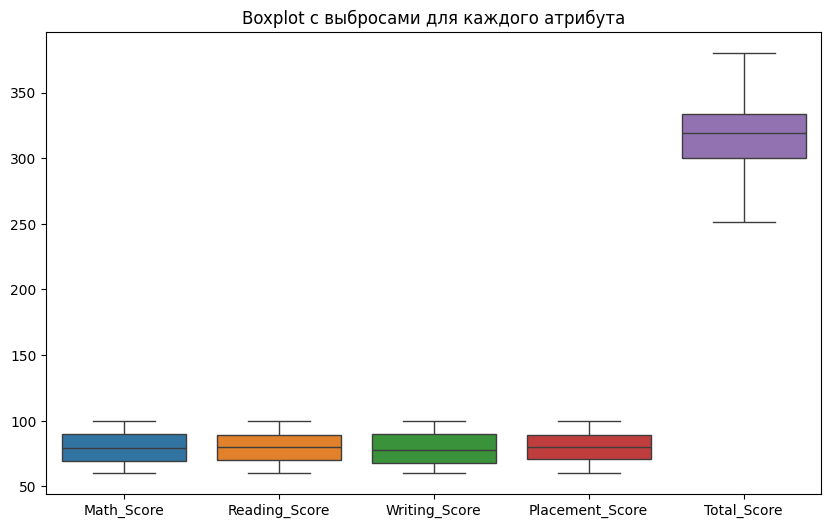

In [7]:
import seaborn as sns

for column in new_df.columns:
    Q1 = new_df[column].quantile(0.25) # 25-й процентиль
    Q3 = new_df[column].quantile(0.75) # 75-й процентиль
    IQR = Q3 - Q1 # межквартильного размаха
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column}: lower_bound = {lower_bound}, upper_bound = {upper_bound}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df)
plt.title("Boxplot с выбросами для каждого атрибута")
plt.show()

Из полученных диаграмм видно, что выбросы для каждого атрибута отсутствуют (присутствие выбросов отображалось бы точками за границами размаха для каждого атрибута). В этом также можно убедиться, построив гистограммы значий для каждого атрибута: 

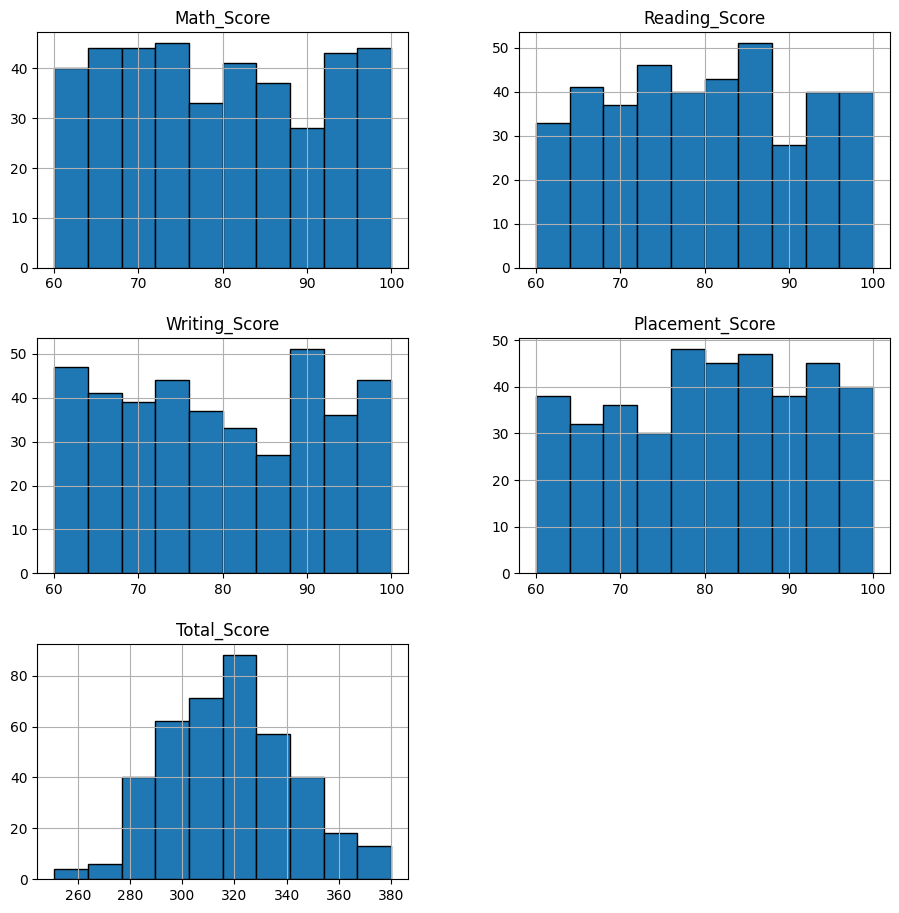

In [8]:
new_df.hist(figsize=(11,11), edgecolor = 'black')
plt.show()

Отсюда видно, что отсутствувют значения, которые не попадают в границы размаха для каждого атрибута:
Math_Score: lower_bound = 37.5, upper_bound = 121.5
Reading_Score: lower_bound = 41.5, upper_bound = 117.5
Writing_Score: lower_bound = 35.0, upper_bound = 123.0
Placement_Score: lower_bound = 44.0, upper_bound = 116.0
Total_Score: lower_bound = 249.0, upper_bound = 385.0

**4) Кластеризация**

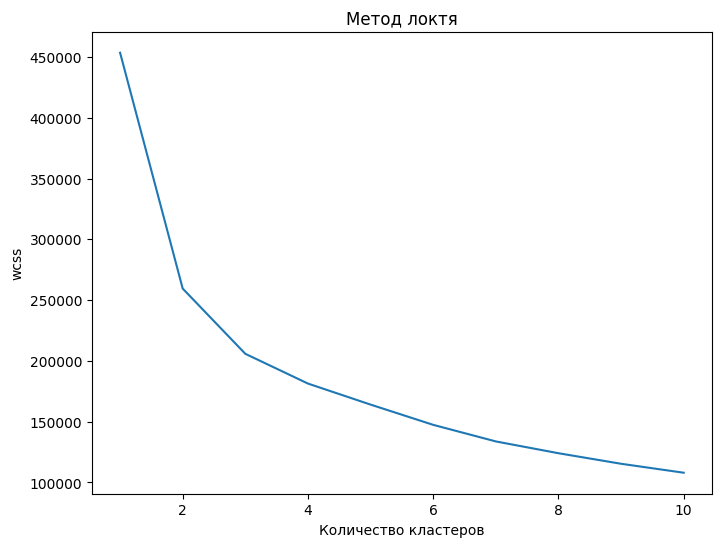

In [10]:
X = new_df.values[:]
wcss = []
for iter in range(1,11):
    kmeans = KMeans(n_clusters = iter, init = 'k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.subplots(figsize=(8, 6))
plt.plot(range(1,11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

In [24]:
clusters_count = 2 #по графику (место, где замедляетсяя падение wcss и график становится более гладким)
k_means = KMeans(init='k-means++', n_clusters=clusters_count, n_init=12)
k_means.fit(X)
labels = k_means.labels_
new_df['cluster'] = labels
print(new_df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Total_Score  \
0          65             86             67               78          296   
1          64             85             71               80          300   
2          76             77             77               84          314   
3          80             76             75               75          306   
4          63             91             62               90          306   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


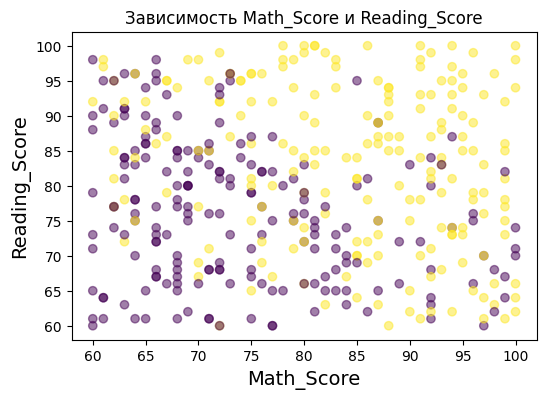

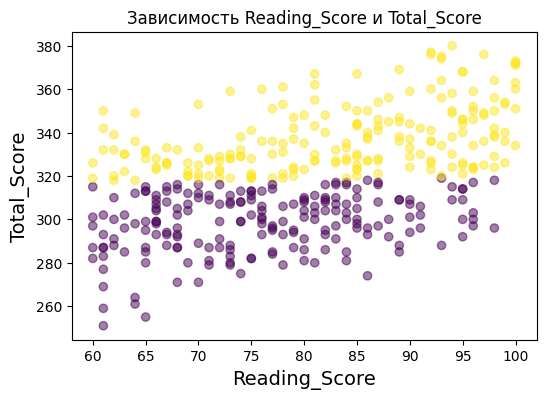

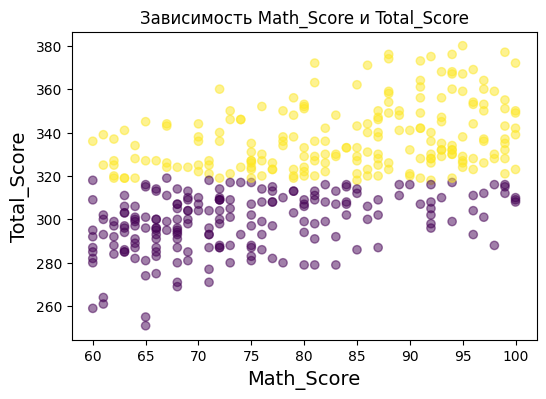

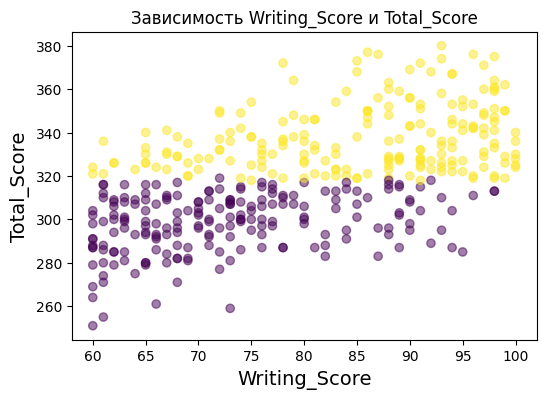

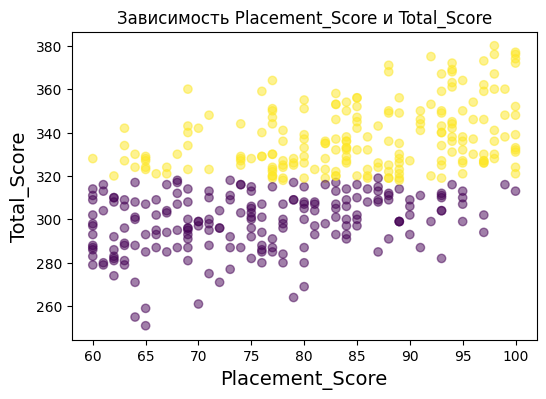

In [30]:
attributes = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', 'Total_Score']

#Math_Score vs Reading_Score
plt.figure(figsize=(6, 4))
plt.scatter(new_df[attributes[0]], new_df[attributes[1]], c=labels.astype(float), alpha=0.5)
plt.xlabel(attributes[0], fontsize=14)
plt.ylabel(attributes[1], fontsize=14)
plt.title(f'Зависимость {attributes[0]} и {attributes[1]}')
plt.show()

#Reading_Score vs Total_Score
plt.figure(figsize=(6, 4))
plt.scatter(new_df[attributes[1]], new_df[attributes[4]], c=labels.astype(float), alpha=0.5)
plt.xlabel(attributes[1], fontsize=14)
plt.ylabel(attributes[4], fontsize=14)
plt.title(f'Зависимость {attributes[1]} и {attributes[4]}')
plt.show()

#Math_Score vs Total_Score
plt.figure(figsize=(6, 4))
plt.scatter(new_df[attributes[0]], new_df[attributes[4]], c=labels.astype(float), alpha=0.5)
plt.xlabel(attributes[0], fontsize=14)
plt.ylabel(attributes[4], fontsize=14)
plt.title(f'Зависимость {attributes[0]} и {attributes[4]}')
plt.show()

#Writing_Score vs Total_Score
plt.figure(figsize=(6, 4))
plt.scatter(new_df[attributes[2]], new_df[attributes[4]], c=labels.astype(float), alpha=0.5)
plt.xlabel(attributes[2], fontsize=14)
plt.ylabel(attributes[4], fontsize=14)
plt.title(f'Зависимость {attributes[2]} и {attributes[4]}')
plt.show()

#Placement_Score vs Total_Score
plt.figure(figsize=(6, 4))
plt.scatter(new_df[attributes[3]], new_df[attributes[4]], c=labels.astype(float), alpha=0.5)
plt.xlabel(attributes[3], fontsize=14)
plt.ylabel(attributes[4], fontsize=14)
plt.title(f'Зависимость {attributes[3]} и {attributes[4]}')
plt.show()

**Вывод**

Посмотрев на график зависимости кол-ва баллов по одному предмету от кол-ва баллов по другому, можно увидеть, что отсутствует яркое разделение кластеров, что говорит нам о том, что кол-во баллов по какому-то конкретному предмету не влияет или не зависит от кол-ва баллов по другому предмету. А посмотрев на зависимости общего кол-ва баллов от кол-ва баллов по каждому отдельному предмету, можно увидеть яркое выделение двух кластеров, что говорит нам о том, что все студенты разделяются на 2 группы - набравшие по всем экзаменам больше 320 баллов, меньше 320 соответственно.